In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [5]:
sns.set_theme()

In [6]:
import os

In [85]:
results_root = '/home/kwatchar3/bss_spatial_eval'

ddfs = [
    {
        'delay': 0,
        'path': 'results/20221127183921/results-ok.csv'
    },
    {
        'delay': 1,
        'path': 'results/20221127212020/results-ok.csv'
    },
    {
        'delay': 4,
        'path': 'results/20221127214204/results-ok.csv'
    },
    {
        'delay': 8,
        'path': 'results/20221127214039/results-ok.csv'
    },
    {
        'delay': 16,
        'path': 'results/20221127213751/results-ok.csv'
    },
    {
        'delay': 32,
        'path': 'results/20221127213530/results-ok.csv'
    },
    {
        'delay': 64,
        'path': 'results/20221127213351/results-ok.csv'
    },
    {
        'delay': 128,
        'path': 'results/20221127213238/results-ok.csv'
    },
    {
        'delay': 256,
        'path': 'results/20221127212755/results-ok.csv'
    },
    {
        'delay': 512,
        'path': 'results/20221127212217/results-ok.csv'
    },
]


dfs = []

for d in ddfs:
    df = pd.read_csv(os.path.join(results_root, d['path']))
    df['delay'] = d['delay']
    dfs.append(df)

df = pd.concat(dfs)
df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 
df['dplot'] = df['delay'] + 1

palette = 'viridis'

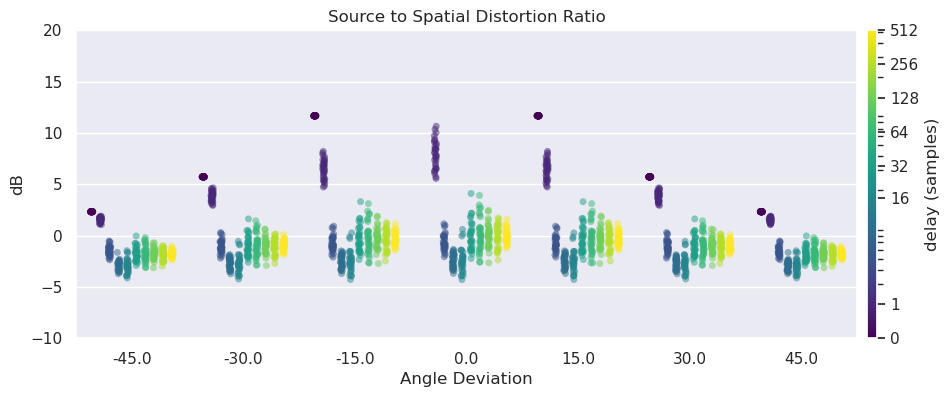

In [88]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.stripplot(df,  y='spr/num', x='est_deviation', hue='dplot', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()))
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation', ylim=[-10, 20])
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()), 
        cmap=palette
    ), 
    ax=ax, label='delay (samples)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 1, 16, 32, 64, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()

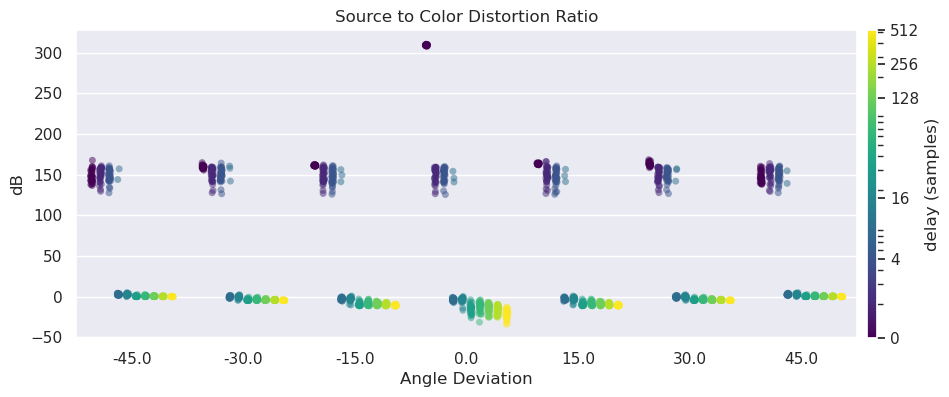

In [94]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.stripplot(df,  y='sfr/num', x='est_deviation', hue='dplot', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()))
ax.set(ylabel='dB', title='Source to Color Distortion Ratio', xlabel='Angle Deviation')
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()), 
        cmap=palette
    ), 
    ax=ax, label='delay (samples)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 4, 16, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()

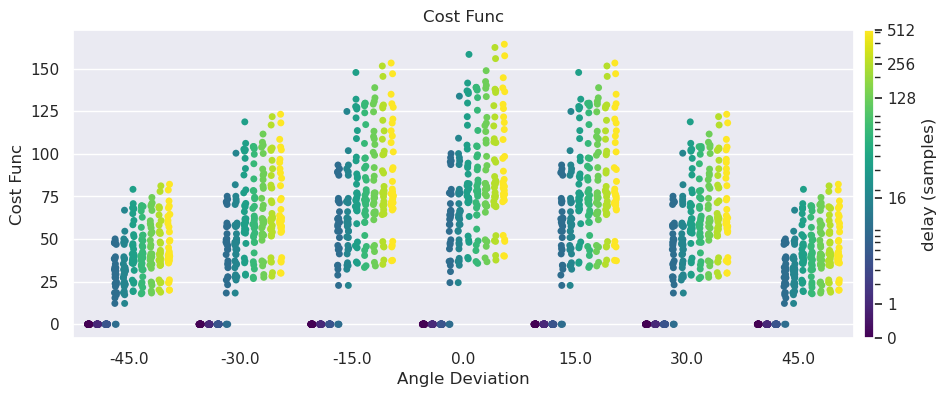

In [97]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='dplot', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()))
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
#
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()), 
        cmap=palette
    ), 
    ax=ax, label='delay (samples)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 1, 16, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()